# 第五章 專題

## 台灣股票市場
### 取得 XHR 資料
- XMLHttpRequest(XRL)：讓頁面能在不更新的狀況下更新資料
- [交易所網址](https://www.twse.com.tw/zh/)

自訂日期格式

避免請求時間過長，IP被封鎖住 → [解法](https://www.youtube.com/watch?v=RddEKFTVpwE)

In [178]:
import pandas as pd
import requests
import json, csv
import os
import numpy as np

import time # 延長 requests 時間間隔

import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected = True)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
              日期         成交股數          成交金額   開盤價   最高價   最低價   收

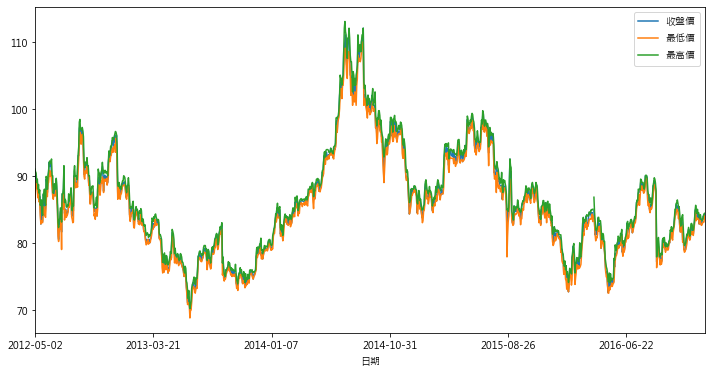

In [180]:
def convertDate(date):
    yearStr,monthStr,dateStr = date.split('/')
    yearStr = str(int(yearStr)+1911)
    date = "{}-{}-{}".format(yearStr , monthStr,dateStr)
    return date

def clearData(data):
    data[0] = convertDate(data[0])

    for i in range(1,len(data)):
        if not i == 7:
            if data[i]=='--':
                data[i] = np.nan
            else:
                data[i] = float(data[i].replace(',',''))

def stockData(year,month,stockId):
    url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+year+month+"01&stockNo="+stockId+"&_=1568871033773"
    res = requests.get(url)
    time.sleep(3.2)
    print(res)
    jdata = json.loads(res.text) # json 解析
    
    columns = jdata['fields']
    data = jdata['data']
    
    for d in data:
        clearData(d)
    return columns,data

def getData(beginYear,beginMonth,endYear,endMonth,stockID):
    bDate = pd.Timestamp("{}-{}-01".format(beginYear,beginMonth))
    eDate = pd.Timestamp("{}-{}-01".format(endYear,endMonth))
    
    cols,data = stockData(beginYear,beginMonth,stockID)
    df = pd.DataFrame(data, columns = cols )
    
    date = bDate + pd.DateOffset(months=1)
    
    while True:
        date = date + pd.DateOffset(months=1)
        
        _, data = stockData(str(date.year),str(date.month).zfill(2) ,stockID)
        tmp = pd.DataFrame(data,columns=cols)
        df = df.append(tmp,ignore_index=True)
        if date == eDate:
            break
            
    return df
     
def main():
    # date
    startYear = '2012'
    startMonth = '05'
    endYear = '2016'
    endMonth = '12'
    stockId = "2317"
    
    df = getData(startYear,startMonth,endYear,endMonth,stockId)
    df.plot(kind="line",figsize=(12,6),x='日期',y=['收盤價','最低價','最高價'])
    print(df)

    # plotly
    pd.options.mode.chained_assignment = None
    
    data = [
        Scatter(x=df['日期'],y=df['收盤價'],name='收盤價'),
        Scatter(x=df['日期'],y=df['最低價'],name='最低價'),
        Scatter(x=df['日期'],y=df['最高價'],name='最高價')
    ]
    plotly.offline.iplot({
        "data":data,
        "layout":Layout(title="個股每月統計圖")
    })

if __name__ == '__main__':
    main()